# Times University ranking dataset analysis

In this codealong we are going to analyze a ranking of universities using regression. Specifically, we are going to **predict the university ranking** with the provided predictors.

---

The information provided in the csv contains:

- **world_rank** - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).
- **university_name** - name of university.
- **country** - country of each university.
- **teaching** - university score for teaching (the learning environment).
- **international** - university score international outlook (staff, students, research).
- **research** - university score for research (volume, income and reputation).
- **citations** - university score for citations (research influence).
- **income** - university score for industry income (knowledge transfer).
- **total_score** - total score for university, used to determine rank.
- **num_students** - number of students at the university.
- **student_staff_ratio** - Number of students divided by number of staff.
- **international_students** - Percentage of students who are international.
- **female_male_ratio** - Female student to Male student ratio.
- **year** - year of the ranking (2011 to 2016 included).

We are going to predict the **total score**, which directly corresponds to the ranking.

---

### ONLY THE DATA PATH IS PROVIDED!

The analysis is up to you. This is an open ended practice. You are expected to:

- Load the packages you need to do analysis
- Perform EDA on variables of interest
- Form a hypothesis or hypotheses on what is important for the score
- Check your data for problems, clean and munge data into correct formats
- Create new variables from columns if necessary
- Perform statistical analysis with regression and describe the results

---

I will obviously be there in class to help, but if you do not know how to do something **I expect you to check documentation first.** I look up things in documentation all the time. 

**You are not expected to know how to do things by heart. Knowing how to effectively look up the answers on the internet is a critical skill for data scientists!**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [41]:
uni_data_path = './dataset/timesData.csv'

In [42]:
unidata = pd.read_csv(uni_data_path)

In [43]:
unidata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [44]:
unidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [54]:
unidata.num_students[0]

unidata.num_students = unidata.num_students.apply(lambda x: str(x).replace(',',''))

In [55]:


def converter(x):
    try:
        return float(x)
    except:
        return np.nan
    
    
# unidata['total_score'] = map(converter, unidata.total_score.values)
# unidata['income'] = map(converter, unidata.income.values)
# unidata['international'] = map(converter, unidata.international.values)
# unidata['num_students'] = map(converter, unidata.num_students.values)

cols = ['international', 'income', 'total_score']

for col in cols:
    unidata[col] = map(converter, unidata[col].values)






print unidata.total_score.values[0:10]

[ 96.1  96.   95.6  94.3  94.2  91.2  91.2  91.1  90.6  89.5]


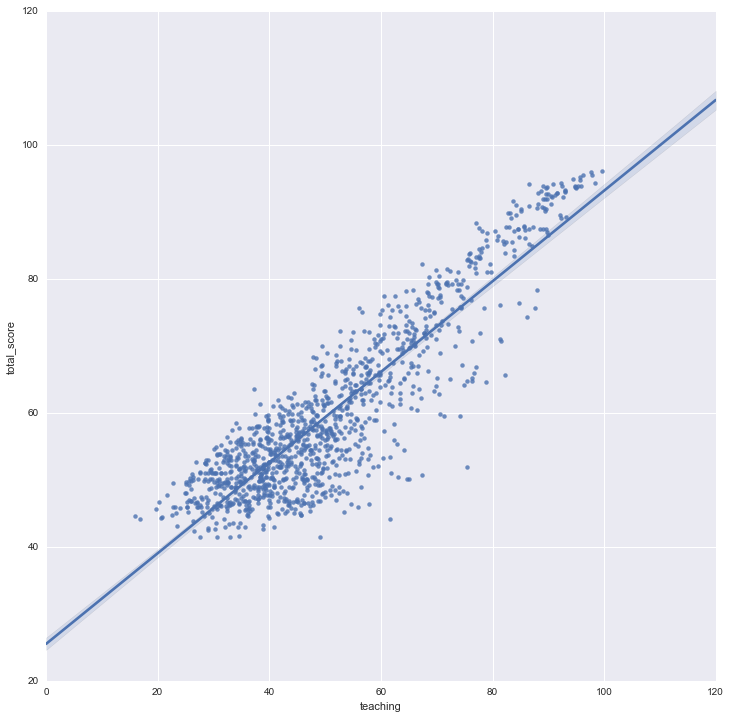

In [56]:
sns.set(rc={"figure.figsize": (12, 12)})

sns.regplot(unidata.teaching, unidata.total_score)

In [57]:
unidata['country'] = unidata['country'].apply(lambda x: x.replace('Unisted States of America', 'United States of America'))

In [58]:
unidata['country'].value_counts()

United States of America    660
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
Japan                        98
Italy                        94
China                        83
Netherlands                  75
France                       73
Sweden                       57
Spain                        57
South Korea                  57
Taiwan                       57
Switzerland                  47
Belgium                      37
Hong Kong                    34
Turkey                       33
Finland                      32
Austria                      31
Republic of Ireland          31
India                        30
New Zealand                  30
Denmark                      29
Brazil                       25
Norway                       21
South Africa                 20
Russian Federation           20
Israel                       19
Portugal                     18
                           ... 
Iceland 

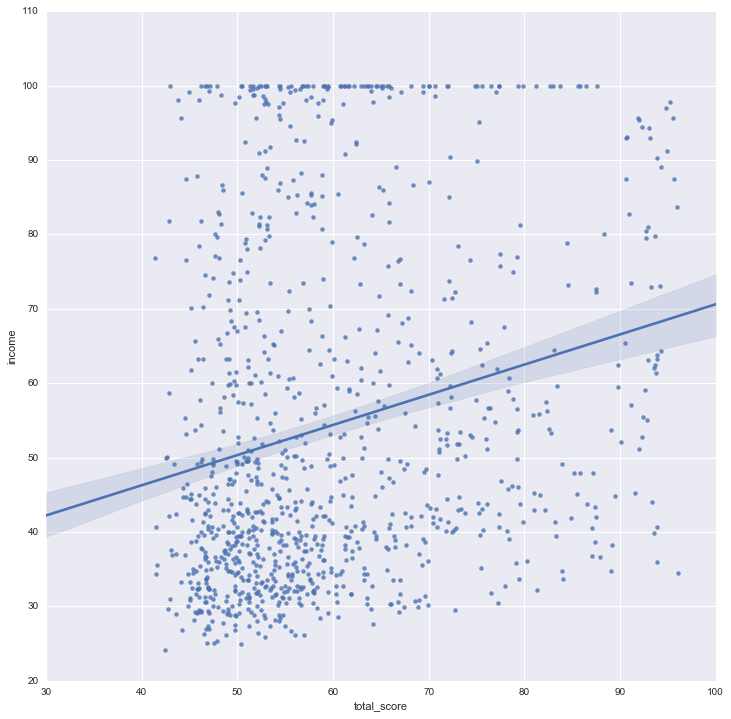

In [59]:
sns.regplot(unidata.total_score, unidata.income)

In [60]:
year_count = unidata.year.value_counts()
year_count

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

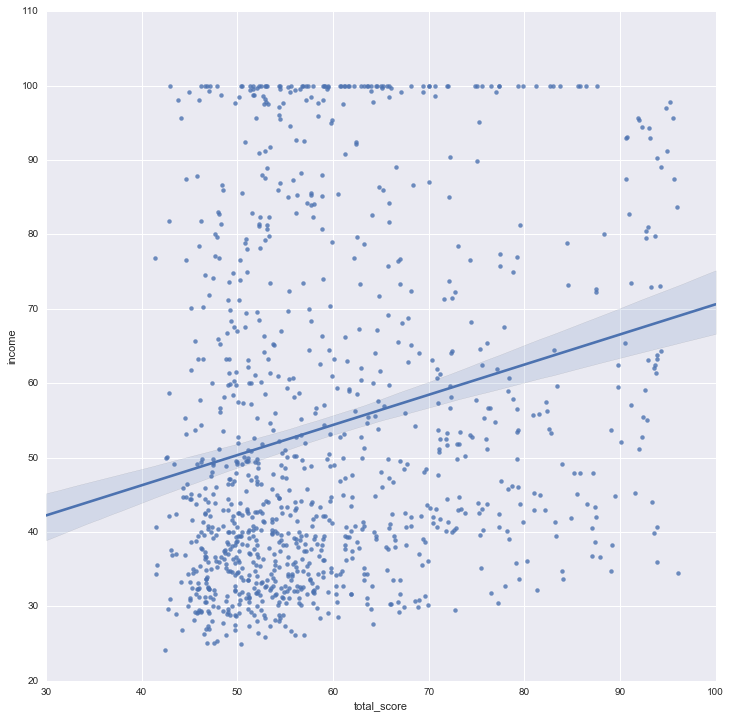

In [61]:
mask_2016 = unidata[unidata['year'] == 2016]
sns.regplot(unidata.total_score, unidata.income)

In [62]:
unidata.num_students

0       20152
1        2243
2       11074
3       15596
4        7929
5       18812
6       19919
7       36186
8       15060
9       11751
10      38206
11      14221
12      15128
13      21424
14      18178
15      41786
16      66198
17      25055
18      20376
19      11885
20      19835
21      26607
22      44020
23      15172
24      18334
25      26199
26      19967
27       3055
28      22020
29      50152
        ...  
2573    53802
2574    19123
2575    29512
2576    29700
2577     7519
2578     2597
2579    20243
2580    10413
2581     6248
2582     2153
2583    24227
2584    23883
2585    28179
2586    69268
2587    28427
2588    14410
2589    22793
2590    19019
2591    34572
2592    52316
2593    15639
2594    22525
2595    12933
2596    16609
2597    31618
2598    21958
2599    31268
2600     4122
2601    10117
2602     8663
Name: num_students, dtype: object

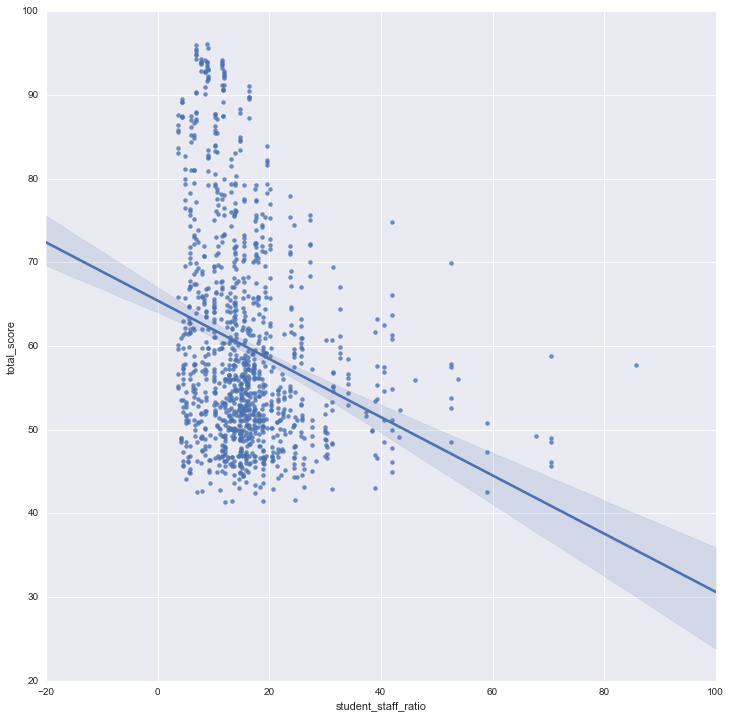

In [65]:
sns.regplot(unidata.student_staff_ratio, unidata.total_score)

In [85]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
df = unidata[['citations', 'research','total_score']]

df.replace('-', np.nan, inplace = True)   #replace hyphens and infiniti values with nan
df.replace(np.inf, np.nan, inplace=True)


df = df.dropna()   # drop not available rows
lr = linear_model.LinearRegression()
cols = ['citations','research']

x = df[cols]   #predict
y = df['total_score']   #response

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3)

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
lr.predict(x_test)

array([ 62.52166802,  59.27834661,  85.87591626,  73.86209434,
        52.80817447,  58.42847594,  92.36512117,  86.09110439,
        64.24107566,  49.84659943,  92.15121408,  62.83828433,
        57.40069427,  68.81039581,  47.71041437,  92.41903786,
        68.62401014,  52.505157  ,  81.34387324,  52.88847245,
        53.86843286,  38.63384168,  51.11419083,  53.82939604,
        73.52419295,  62.73012719,  58.06945833,  88.35336721,
        77.33483625,  57.19351615,  57.79538422,  66.47550728,
        43.44377395,  73.52339055,  51.52792754,  65.11942504,
        58.49645613,  43.40538465,  55.46145298,  88.12762097,
        50.03715198,  70.2885438 ,  87.22159528,  47.13939024,
        68.37202352,  57.81123537,  58.59198571,  48.44059851,
        55.34610221,  46.87462117,  65.93200459,  41.47606793,
        57.22358567,  85.69752662,  66.89098968,  46.76726643,
        92.50671232,  56.19581799,  75.85269025,  46.96547726,
        44.3754065 ,  54.09481263,  72.95046584,  71.68

In [88]:
lr.score(x_test, y_test)

0.96160474121637174

In [89]:
lr.score(x_train, y_train)

0.9629998737569837